## No-linear bounded 

In [47]:
from sklearn.datasets.samples_generator import make_circles
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
from sklearn.datasets.samples_generator import make_blobs

In [48]:
X, Y = make_circles(100, factor = 0.1,noise=0.1)

In [59]:
def plot_SVC(model,ax=None, plot_support=True):
    """Plot 2D decision with SVC"""
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ##Create the points to evaluated the model
    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(xlim[0],ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel(),]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Boundary and margins SVC
    ax.contour(X,Y,P,colors="k",levels=[-1,0,1], alpha = 0.5, linestyles=["--","-","--"])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1, facecolors="blue")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [60]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0,cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1], c=Y, s=50,cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_SVC(model,ax)

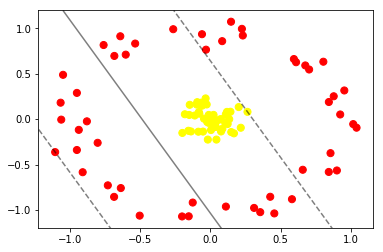

In [61]:
plt.scatter(X[:,0],X[:,1],c=Y, s=50, cmap="autumn")
plot_SVC(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [62]:
r = np.exp(-(X**2).sum(1))

In [63]:
def plot_3d(elev=30,azim=30,X=X,Y=Y,r=r):
    plt.figure(figsize=(10,6))
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=Y,s=50,cmap="autumn")
    ax.view_init(elev=elev,azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("x[1]")
    ax.set_zlabel("r")

In [64]:
interact(plot_3d,elev=[-90,-60,-30,0,30,60,90],azim=[-180,-90,-60,-30,0,30,60,90,180],X=fixed(X),Y=fixed(Y),r=fixed(r))

interactive(children=(Dropdown(description=u'elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30), Dropdown(description=u'azim', index=5, options=(-180, -90, -60, -30, 0, 30, 60, 90, 180), value=30), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3d>

In [65]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

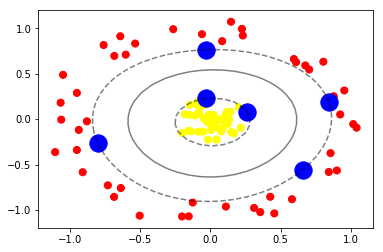

In [66]:
plt.scatter(X[:,0],X[:,1],c=Y, s=50,cmap="autumn")
plot_SVC(rbf)
plt.scatter(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1],s=300,lw=1,facecolors="none")

### Adjust the SVM params

In [69]:
X, Y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)

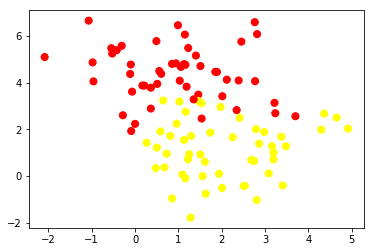

In [70]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap="autumn",s=50)

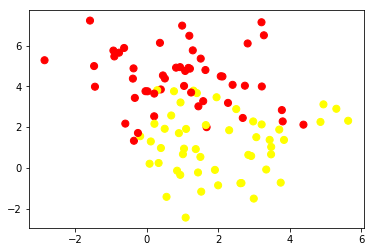

In [78]:
X, Y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1],c=Y,cmap="autumn",s=50)

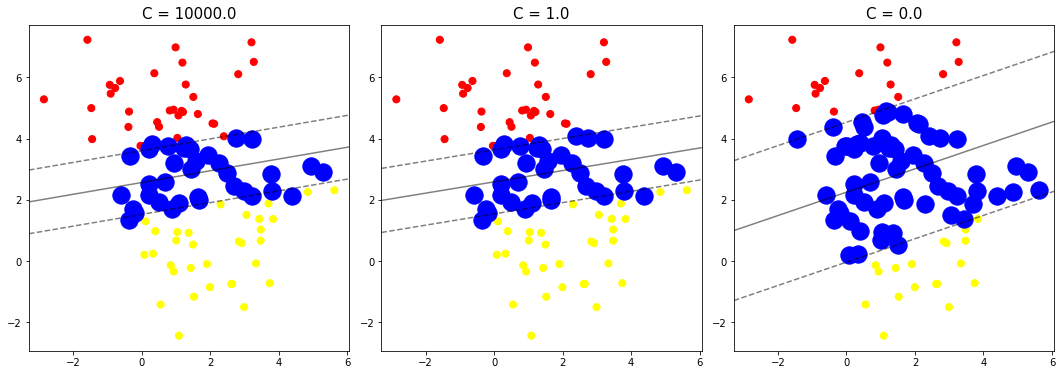

In [83]:
fig, ax = plt.subplots(1,3,figsize=(16,6))
fig.subplots_adjust(left=0.06, right=0.95, wspace=0.1)
for ax_i, C in zip(ax, [10000.0,1, 0.01]):
    model = SVC(kernel="linear",C = C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    plot_SVC(model,ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)